<a href="https://colab.research.google.com/github/RudrakshSugandhi/VNPD-Vehicle-Number-plate-Detection-/blob/Code-V1/end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Yolo V5 with EasyOCR implemetation on single image

In [17]:
%cd /Volumes/Drive D/Purdue Courses/Fall2022/DL/project/VNPD-Vehicle-Number-plate-Detection-/

/Volumes/Drive D/Purdue Courses/Fall2022/DL/project/VNPD-Vehicle-Number-plate-Detection-


# YOLO V5 Implementation

In [18]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
#from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from IPython.display import display
#from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests 
from PIL import Image

In [19]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [20]:
model = torch.hub.load('ultralytics/yolov5','custom', path = 'best_model_weights.pt')

Using cache found in /Users/rudraksh/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-26 Python-3.9.7 torch-1.12.1 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [21]:
img = "/Volumes/Drive D/Purdue Courses/Fall2022/DL/project/VNPD-Vehicle-Number-plate-Detection-/car1.png"

In [22]:
## for future code for live feed detection
'''cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()'''

"cap = cv2.VideoCapture(0)\nwhile cap.isOpened():\n    ret, frame = cap.read()\n    \n    # Make detections \n    results = model(frame)\n    \n    cv2.imshow('YOLO', np.squeeze(results.render()))\n    \n    if cv2.waitKey(10) & 0xFF == ord('q'):\n        break\ncap.release()\ncv2.destroyAllWindows()"

image 1/1: 742x1200 1 licence
Speed: 27.9ms pre-process, 367.3ms inference, 0.9ms NMS per image at shape (1, 3, 416, 640)


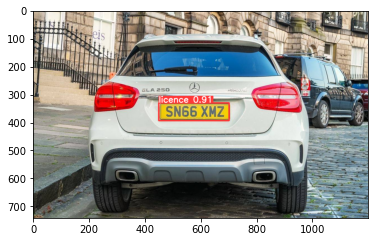

In [23]:
result = model(img)
result.print()
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [26]:
box_raw= result.xyxy[0][0]
bbox = []
for bound in box_raw:
  bbox.append(int(bound.item()))
bbox = bbox[:4]
print(bbox)


[450, 331, 702, 394]


In [27]:
img = Image.open("/Volumes/Drive D/Purdue Courses/Fall2022/DL/project/VNPD-Vehicle-Number-plate-Detection-/car1.png")
X = bbox[0]
Y = bbox[1]
W = bbox[2]
H = bbox[3]
box = (X, Y, W, H)
crop = img.crop(box)
crop.save('/Volumes/Drive D/Purdue Courses/Fall2022/DL/project/VNPD-Vehicle-Number-plate-Detection-/cropImage.png')


### TrOCR for image to Text

In [14]:
!pip3 install easyocr

In [28]:
import os
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [29]:
IMAGE_PATH = '/Volumes/Drive D/Purdue Courses/Fall2022/DL/project/VNPD-Vehicle-Number-plate-Detection-/cropImage.png'
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH,paragraph="False")
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[[20, 4], [244, 4], [244, 58], [20, 58]], 'SN66 XMZ']]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
